In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Menghubungkan ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 1. DATA UNDERSTANDING
print("--- 1. DATA UNDERSTANDING ---")
# Sesuaikan path dengan lokasi file Anda
path = '/content/drive/MyDrive/Colab Notebooks/airquality.csv'
df = pd.read_csv(path)

# Melihat informasi dasar dataset
print(f"Bentuk Data: {df.shape}")
print("\n5 Baris Pertama:")
print(df.head())
print("\nInformasi Kolom:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Mounted at /content/drive
--- 1. DATA UNDERSTANDING ---
Bentuk Data: (503, 7)

5 Baris Pertama:
         Date        Open        High         Low       Close   Adj Close  \
0  2018-07-02  183.820007  187.300003  183.419998  187.179993  182.199005   
1  2018-07-03  187.789993  187.949997  183.539993  183.919998  179.025772   
2  2018-07-05  185.259995  186.410004  184.279999  185.399994  180.466370   
3  2018-07-06  185.419998  188.429993  185.199997  187.970001  182.967972   
4  2018-07-09  189.500000  190.679993  189.300003  190.580002  185.508545   

     Volume  
0  17731300  
1  13954800  
2  16604200  
3  17485200  
4  19756600  

Informasi Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    flo

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], color='blue')
plt.title('Tren Nilai Close (Target Prediksi)')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai')
plt.show()

In [6]:
print("\n--- 2. DATA PREPARATION ---")

# Memilih fitur (X) dan target (y)
# Kita menggunakan Open, High, Low, Volume untuk memprediksi Close
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df[features].values
y = df[target].values

# Normalisasi Data (Penting untuk Neural Networks)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

print(f"Jumlah Data Training: {len(X_train)}")
print(f"Jumlah Data Testing: {len(X_test)}")
print("\n--- 3. DESAIN NEURAL NETWORKS ---")

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2), # Untuk mencegah overfitting
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1) # Output layer untuk regresi
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()


--- 2. DATA PREPARATION ---
Jumlah Data Training: 352
Jumlah Data Testing: 151

--- 3. DESAIN NEURAL NETWORKS ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)


--- 4. TRAINING DAN EVALUASI ---
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1673 - mae: 0.3244 - val_loss: 0.0117 - val_mae: 0.0894
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0153 - mae: 0.0972 - val_loss: 0.0058 - val_mae: 0.0645
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mae: 0.0749 - val_loss: 0.0021 - val_mae: 0.0380
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mae: 0.0586 - val_loss: 7.1657e-04 - val_mae: 0.0214
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mae: 0.0450 - val_loss: 6.6746e-04 - val_mae: 0.0198
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 - mae: 0.0459 - val_loss: 7.3125e-04 - val_mae: 0.0216
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mae: 0.0444 - val_loss: 5.0150e-04 - val_mae: 0.0178
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - mae: 0.0367 - val_loss: 4.1114e-04 - val_mae: 0.0158
Epoch 9/1

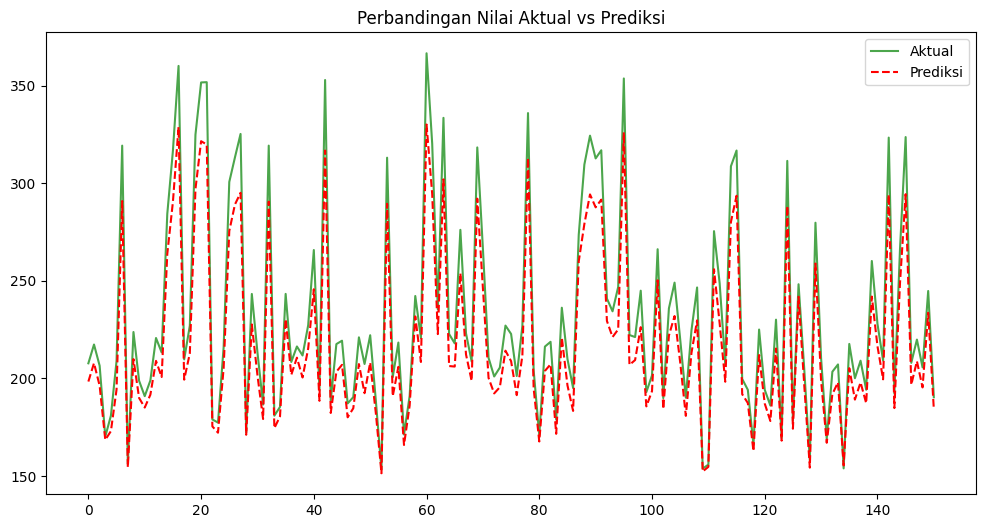

In [7]:
print("\n--- 4. TRAINING DAN EVALUASI ---")

# Proses Training
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

# Evaluasi Model
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test)

# Metrik Evaluasi
mse = mean_squared_error(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-Squared Score: {r2:.4f}")

# Plot Hasil Prediksi vs Aktual
plt.figure(figsize=(12, 6))
plt.plot(y_actual, label='Aktual', color='green', alpha=0.7)
plt.plot(y_pred, label='Prediksi', color='red', linestyle='--')
plt.title('Perbandingan Nilai Aktual vs Prediksi')
plt.legend()
plt.show()
